In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

In [ ]:
# Path to the directory containing .txt files
dir = "/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018"

#Q1:
**Q1-A:** Number of people who develop this cancer in the USA is 100,000 and its more commen in men than women. 47.7% of cases are malignant brain and other CNS tumors. About 40% of patients survive in the first year after diagnosis and 17% in the second.


**Q1-B:** When SHH signaling is abnormally activated, it frequently causes widespread hyperplasia and leads to medulloblastoma, a common malignant pediatric brain tumor that originates in the cerebellum. The Sonic Hedgehog (SHH) pathway is involved in the development and progression of various cancers. Elevated levels of SHH are associated with poorer prognoses and decreased survival rates. In cancer cells, SHH is overexpressed and released into the tumor stroma, where it activates signaling pathways in stromal cells. This activation prompts stromal cells to produce target proteins that are then released into the tumor microenvironment. These proteins create a favorable environment for tumor growth and progression by promoting cell proliferation, angiogenesis, and invasion into surrounding tissues.

#Q2:

My study group consists of tumor data from 514 people diagnosed with glioblastoma, totaling 514 observations. Although there are various variables recorded for each observation, not all data points were collected for every case. I'll be utilizing a mix of gene expression, copy number, mutation, and clinical data. The gene expression data covers the expression levels of 20,531 genes across 515 tumor samples. The mutation data provides information on mutations in 39,299 genes, while the copy number data includes details for 25,128 genes across 512 tumor samples, the methylation data includes information for 22601 genes and 517 tumor samples. Additionally, the clinical data contains important variables such as patient age and sex. Specifically, I'll focus on the survival time post-diagnosis, recorded in months, from the clinical dataset for this project

#Q3:



In [ ]:
#data of the copy number variation of genes

import os
import pandas as pd

# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_cna.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    df = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
df

In [ ]:
#flip the table
df_transposed = df.transpose()
df_transposed

In [ ]:
# List of genes to filter for
genes_to_filter = ['PTCH2', 'SMO','SHH']

# Filter the DataFrame for the specified genes
geness = df.loc[genes_to_filter]
geness


In [ ]:
#get the mutation for genes
import os
# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_mutations.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    df3 = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
df3

#mutation:

<ipython-input-15-d91ef8804e77>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(filename, delimiter='\t', index_col=0)


<Figure size 1000x600 with 0 Axes>

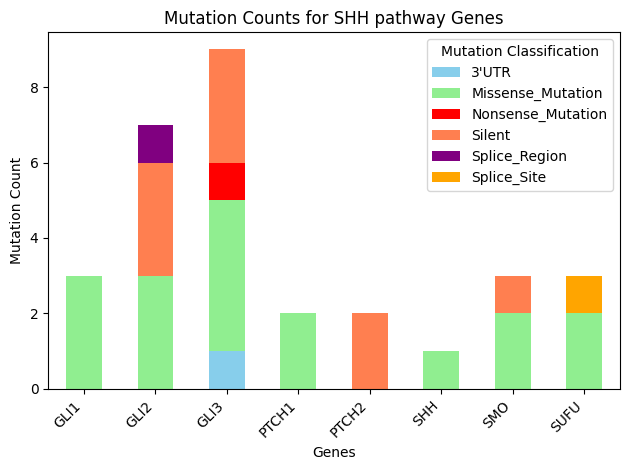

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")
# Load the data
filename = "data_mutations.txt"
df3 = pd.read_csv(filename, delimiter='\t', index_col=0)

# List of selected genes
selected_genes = ["PTCH1", "PTCH2", "SHH", "SMO", "GLI1", "GLI2", "GLI3", "SUFU", "kif7"]

# Define color mapping for mutations
mutation_colors = {
    '3\'UTR': 'skyblue',
    'Missense_Mutation': 'lightgreen',
    'Nonsense_Mutation': 'red',
    'Silent': 'coral',
    'Splice_Region': 'purple',
    'Splice_Site': 'orange',
}

# Filter mutations for selected genes
mutations_filtered = df3[df3.index.isin(selected_genes)]

# Group mutations by gene and mutation classification, then count occurrences
mutation_counts = mutations_filtered.groupby([mutations_filtered.index, 'Variant_Classification']).size().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
mutation_counts.plot(kind='bar', stacked=True, color=[mutation_colors.get(c, 'gray') for c in mutation_counts.columns])
plt.title('Mutation Counts for SHH pathway Genes')
plt.xlabel('Genes')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Mutation Classification')
plt.show()


#copy number:

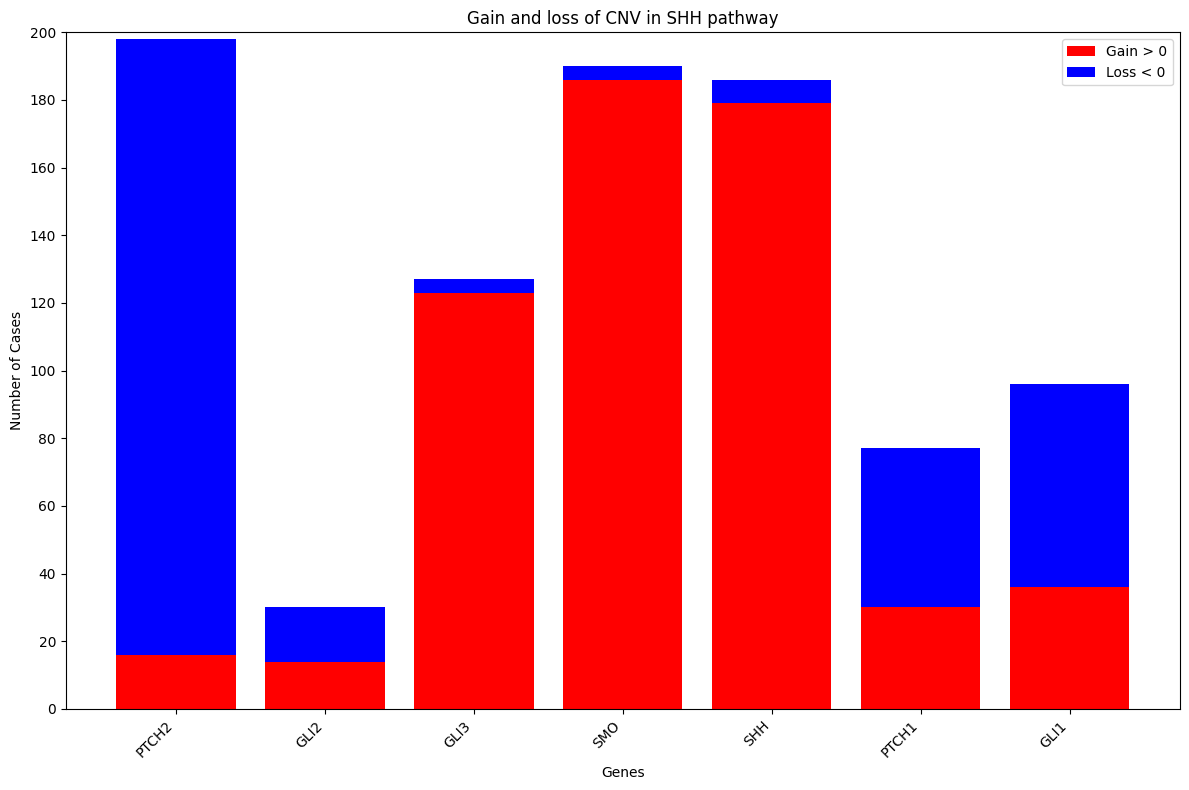

In [ ]:
import matplotlib.pyplot as plt

# List of genes
selected_genes = [
    "PTCH1", "PTCH2", "SHH", "SMO", "GLI1", "GLI2","GLI3", "GLI3", "kif7", "sufu"
]

# Exclude the first row from the transposed DataFrame and filter by selected genes
df_transposed = df_transposed.iloc[1:]
df_selected = df_transposed[df_transposed.columns.intersection(selected_genes)]

# Prepare data for plotting
positive_values = df_selected.clip(lower=0).sum()  # Sum positive values across selected genes
negative_values = df_selected.clip(upper=0).abs().sum()  # Sum negative values across selected genes
genes = df_selected.columns

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35  # Adjust as needed
bar_positions = range(len(genes))

ax.bar(bar_positions, positive_values, color='red', label='Gain > 0')
ax.bar(bar_positions, negative_values, color='blue', label='Loss < 0', bottom=positive_values)

# Customize plot
ax.set_xticks(bar_positions)
ax.set_xticklabels(genes, rotation=45, ha='right')
ax.set_ylabel('Number of Cases')
ax.set_yticks(range(0, 201, 20))  # Set y-axis ticks from 0 to 200 with a step of 20
ax.set_ylim(0, 200)  # Set y-axis limits from 0 to 200
ax.set_xlabel('Genes')
ax.set_title('Gain and loss of CNV in SHH pathway')
ax.legend()

plt.tight_layout()
plt.show()

**Q:3b How many patients have each gene mutated with either copy number alterations or point mutation?**


In [ ]:
# copy_number_Count the number of patients with mutations for each gene
copy_number_alteration_counts = df_selected.astype(bool).sum()

# Display the copy number counts for each gene
print("Mutation counts for each gene:")
print(copy_number_alteration_counts)


# Filter mutations for SHH selected genes and point mutations
point_mutations = df3[(df3.index.isin(selected_genes)) & (df3['Variant_Classification'].isin(mutation_counts))]

# Group by gene and count unique patients for each gene
patient_counts = point_mutations.groupby('Hugo_Symbol')['Tumor_Sample_Barcode'].nunique()

# Print the results
print(patient_counts)

Mutation counts for each gene:
Hugo_Symbol
PTCH2    197
GLI2      30
GLI3     122
SMO      182
SHH      178
PTCH1     75
GLI1      85
dtype: int64
Hugo_Symbol
GLI1     3
GLI2     6
GLI3     6
PTCH1    1
PTCH2    2
SHH      1
SMO      2
Name: Tumor_Sample_Barcode, dtype: int64


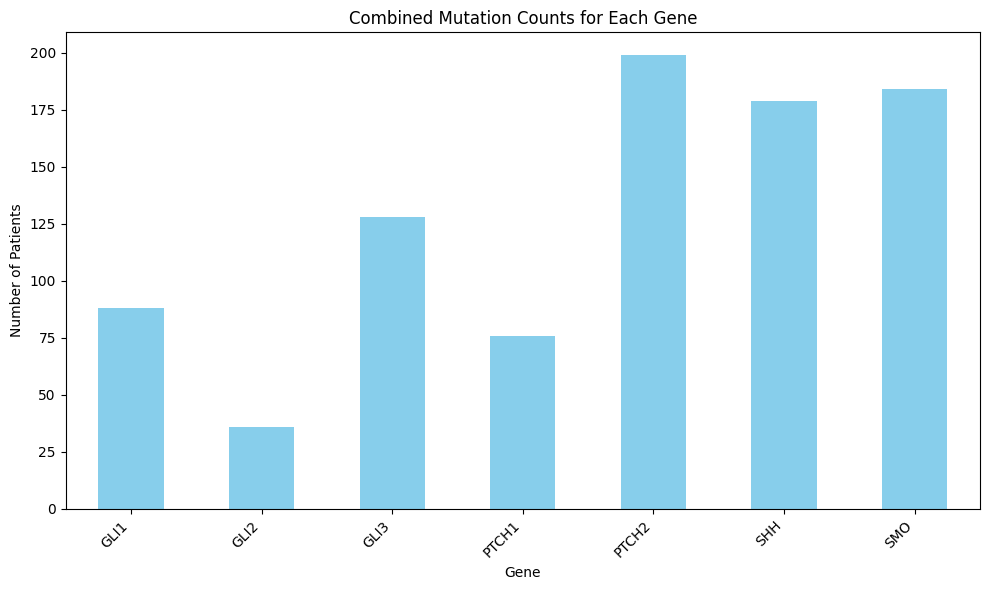

In [ ]:
# Combine copy number alteration counts and point mutation counts for each gene
combined_counts = copy_number_alteration_counts.add(patient_counts, fill_value=0)

# Plotting the combined mutation counts for each gene
plt.figure(figsize=(10, 6))
combined_counts.plot(kind='bar', color='skyblue')
plt.title('Combined Mutation Counts for Each Gene')
plt.xlabel('Gene')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Q3-C: For the top 3 most mutated genes:**

The top three genes are PTCH2, SMO and SHH

In [ ]:
# make a dataframe including the copy number alteration and point mutations for each gene
#then get the total amount number for each gene

# Data of counts
copy_number_counts = {
    'PTCH2': 197,
    'GLI2': 30,
    'GLI3': 122,
    'SMO': 182,
    'SHH': 178,
    'PTCH1': 75,
    'GLI1': 85
}

point_mutation_counts = {
    'GLI1': 3,
    'GLI2': 6,
    'GLI3': 6,
    'PTCH1': 1,
    'PTCH2': 2,
    'SHH': 1,
    'SMO': 2
}

# Convert dictionaries to Series
cna_series = pd.Series(copy_number_counts, name='Copy_Number_Alterations')
pm_series = pd.Series(point_mutation_counts, name='Point_Mutations')

# Create DataFrame
gene_counts = pd.DataFrame({
    'Copy_Number_Alterations': cna_series,
    'Point_Mutations': pm_series
})

# Calculate grand total for each gene
gene_counts['Total'] = gene_counts['Copy_Number_Alterations'] + gene_counts['Point_Mutations']

# Display the DataFrame
gene_counts


,Copy_Number_Alterations,Point_Mutations,Total
GLI1,85,3,88
GLI2,30,6,36
GLI3,122,6,128
PTCH1,75,1,76
PTCH2,197,2,199
SHH,178,1,179
SMO,182,2,184


In [ ]:
#to get how often each gene mutated, I will divid the number of total mutation by the number of total tumor in the data
gene_counts['Rate_of_mutation'] = gene_counts['Total'] / 511
gene_counts

,Copy_Number_Alterations,Point_Mutations,Total,Rate_of_mutation
GLI1,85,3,88,0.172211
GLI2,30,6,36,0.070450
GLI3,122,6,128,0.250489
PTCH1,75,1,76,0.148728
PTCH2,197,2,199,0.389432
SHH,178,1,179,0.350294
SMO,182,2,184,0.360078


**how often is each gene mutated
are the mutations activating or inactivating?**

According to the numbers above as they present how often these genes are mutated.These genes (PTCH2, SMO and SHH) are mutated often (as they have a value of 0.3) as we can see an increase in the number of cases compared to other genes. For SHH and SMO I think these are activating genes because we can see in the bar graph an increase in red color compared to blue this indicates a gain of copy number. However the PTCH2 is inactivating as we can see majority of blue color as this indicates a loss of copy number.


**Is the mutation pattern consistent with oncogene or tumor suppressor activity in cancer?**

In the SMO and SHH its more likely to be consistant with oncogene. However in PTCH2 its more likely to be consistant with tumor suppressor activiy


**Q3-D: Which of your top 3 mutations is associated with increased or decreased survival outcome?**


mean value for the Overall Survival (Months): 31.7

mean value for PTCH2 Survival Months:32.7

mean value for SMO Survival Months:30.9

mean value for SHH Survival Months:30.6

Overall there is no difference between all three genes and Overall Survival (Months). But to be more accurate there is a slit increase in the overall survival between PTCH2, and Overall Survival (Months). But there is a slit decrease of survival rate in the SMO and SHH genes compared to the Overall Survival (Months)

In [ ]:
import os
# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_clinical_patient.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    clinical_df = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
clinical_df

In [ ]:
# Clone df_transposed to a new DataFrame
new_df_transposed = df_transposed.copy()

# Update the index in the new DataFrame by removing '-01'
new_df_transposed .index = new_df_transposed .index.str.replace("-01", "", regex=False)

# Display the updated new DataFrame to verify the changes
new_df_transposed


In [ ]:
# Concatenate new_df_transposed and clinical_df along the columns axis
combined_cli_cnv = pd.concat([new_df_transposed , clinical_df], axis=1)

# Display the combined DataFrame
combined_cli_cnv


In [ ]:
#get the mean value of Overall Survival (Months)

# Filter for the "Overall Survival (Months)" column and the "PTCH2", "SHH", and "SMO" columns
filtered_df = combined_cli_cnv[['Overall Survival (Months)', 'PTCH2', 'SHH', 'SMO']]
# Remove rows with index labels "#1" and "PATIENT_ID"
filtered_df = filtered_df.drop(["#1", "PATIENT_ID", "#STRING","#Identifier to uniquely specify a patient."], errors='ignore')

# Remove NaN values from the "Overall Survival (Months)" column
filtered_df = filtered_df.dropna(subset=['Overall Survival (Months)'])


# Remove non-numeric characters from the "Overall Survival (Months)" column
filtered_df['Overall Survival (Months)'] = filtered_df['Overall Survival (Months)'].str.replace('[^\d.]', '', regex=True)

# Convert the "Overall Survival (Months)" column to numeric
filtered_df['Overall Survival (Months)'] = pd.to_numeric(filtered_df['Overall Survival (Months)'], errors='coerce')

# Calculate the mean for the "Overall Survival (Months)" column
mean_survival_months = filtered_df['Overall Survival (Months)'].mean()

# Display the mean survival months
print("Mean Survival Months:", mean_survival_months)


Mean Survival Months: 31.675318024877193


In [ ]:
#get mean value of PTCH2

# Drop rows with NaN values
filtered_df = filtered_df.dropna()

# Filter out rows where PTCH2 is zero
filtered_df = filtered_df[filtered_df['PTCH2'] != 0.0]


# Convert the "Overall Survival (Months)" column to numeric
filtered_df['Overall Survival (Months)'] = pd.to_numeric(filtered_df['Overall Survival (Months)'], errors='coerce')

# Calculate the mean of the "Overall Survival (Months)" column
mean_survival_months = filtered_df['Overall Survival (Months)'].mean()

# Display the mean survival months
print("Mean Survival Months:", mean_survival_months)



Mean Survival Months: 32.69046882830965


In [ ]:
#get mean value of SHH

# Filter for the "Overall Survival (Months)" column and the "SHH" column
filtered_df1 = combined_cli_cnv[['Overall Survival (Months)', 'SHH']]

# Drop rows with NaN values
filtered_df1 = filtered_df1.dropna()

# Filter out rows where SHH is zero
filtered_df1 = filtered_df1[filtered_df1['SHH'] != 0.0]


# Convert the "Overall Survival (Months)" column to numeric
filtered_df1['Overall Survival (Months)'] = pd.to_numeric(filtered_df1['Overall Survival (Months)'], errors='coerce')

# Calculate the mean of the "Overall Survival (Months)" column
mean_survival_months2 = filtered_df1['Overall Survival (Months)'].mean()

# Display the mean survival months
print("Mean Survival Months:", mean_survival_months2)

Mean Survival Months: 30.6289393912191


In [ ]:
#get mean value of SMO

# Filter for the "Overall Survival (Months)" column and the "SMO" column
filtered_df2 = combined_cli_cnv[['Overall Survival (Months)', 'SMO']]

# Drop rows with NaN values
filtered_df2 = filtered_df2.dropna()

# Filter out rows where SMO is zero
filtered_df2 = filtered_df2[filtered_df2['SMO'] != 0.0]


# Convert the "Overall Survival (Months)" column to numeric
filtered_df2['Overall Survival (Months)'] = pd.to_numeric(filtered_df2['Overall Survival (Months)'], errors='coerce')

# Calculate the mean of the "Overall Survival (Months)" column
mean_survival_months1 = filtered_df2['Overall Survival (Months)'].mean()

# Display the mean survival months
print("Mean Survival Months:", mean_survival_months1)

Mean Survival Months: 30.9744008833022


**Q3-E: How often is the pathway mutated overall in this cancer (how many patients have one or more genes mutated)?**

Frequency mutation around 66%, suggests that this cancer dataset commonly display alterations within the pathway. About 66% of patients display mutations in at least one of the genes pathway

In [ ]:
# do not include the first column (gene ID) and find how may patients have mutation in at least 1 gene on the pathway
count_per_column_not_equal_zero = (geness.iloc[:, 1:] != 0).any().sum(axis=0)
# divide by the total amount of patients
Rate_of_mutation_in_pathway = count_per_column_not_equal_zero/511
#show results
Rate_of_mutation_in_pathway

0.6653620352250489

#Q4-A:

I will pick the SHH gene for my gene expression analysis.


In [ ]:
#methylation of data

import os

# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_methylation_hm27_hm450_merged.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    df1 = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
df1

In [ ]:
# searching for rows that include SHH

SHH_rows = df1.loc[df1['NAME'] == 'SHH']

#flipping table (rows to be column and vise versa)
SHH_tra = SHH_rows.transpose()

# Exclude row 2 and row 3 from the DataFrame
SHH_tra_cleaned = SHH_tra.drop(index=['DESCRIPTION', 'TRANSCRIPT_ID'])
SHH_tra_cleaned

In [ ]:
#gene expression data

import os
import pandas as pd

# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_mrna_seq_v2_rsem.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    df2 = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
df2.head()

In [ ]:
#make EGFR in the column
ext= df2.transpose()

# Extract the column corresponding to EGFR
SHH_column = ext['SHH']

#add this column to the egfr_tra_cleaned dataset
SHH_tra_cleaned['SHH_expression'] = ext['SHH']


In [ ]:
#show results
SHH_tra_cleaned

ENTITY_STABLE_ID,cg00577464,cg25167838,SHH_expression
NAME,SHH,SHH,NaN
TCGA-CS-4938-01,0.037688,0.014365,0.8391
TCGA-CS-4941-01,0.070732,0.045589,1.0352
TCGA-CS-4942-01,0.051849,0.017624,5.8824
TCGA-CS-4943-01,0.046645,0.01624,0.3261
...,...,...,...
TCGA-WY-A85B-01,0.040326,0.016372,8.1756
TCGA-WY-A85C-01,0.033985,0.013038,2.0433
TCGA-WY-A85D-01,0.029317,0.012325,2.4655
TCGA-WY-A85E-01,0.045583,0.014087,3.0246


In [ ]:
# Calculate the sum of methylation levels for each sample
SHH_tra_cleaned['methylation_sum'] = SHH_tra_cleaned[['cg00577464', 'cg25167838']].sum(axis=1)

In [ ]:
#show results
SHH_tra_cleaned

ENTITY_STABLE_ID,cg00577464,cg25167838,SHH_expression,methylation_sum
NAME,SHH,SHH,NaN,SHHSHH
TCGA-CS-4938-01,0.037688,0.014365,0.8391,0.052053
TCGA-CS-4941-01,0.070732,0.045589,1.0352,0.116321
TCGA-CS-4942-01,0.051849,0.017624,5.8824,0.069474
TCGA-CS-4943-01,0.046645,0.01624,0.3261,0.062885
...,...,...,...,...
TCGA-WY-A85B-01,0.040326,0.016372,8.1756,0.056698
TCGA-WY-A85C-01,0.033985,0.013038,2.0433,0.047023
TCGA-WY-A85D-01,0.029317,0.012325,2.4655,0.041642
TCGA-WY-A85E-01,0.045583,0.014087,3.0246,0.05967


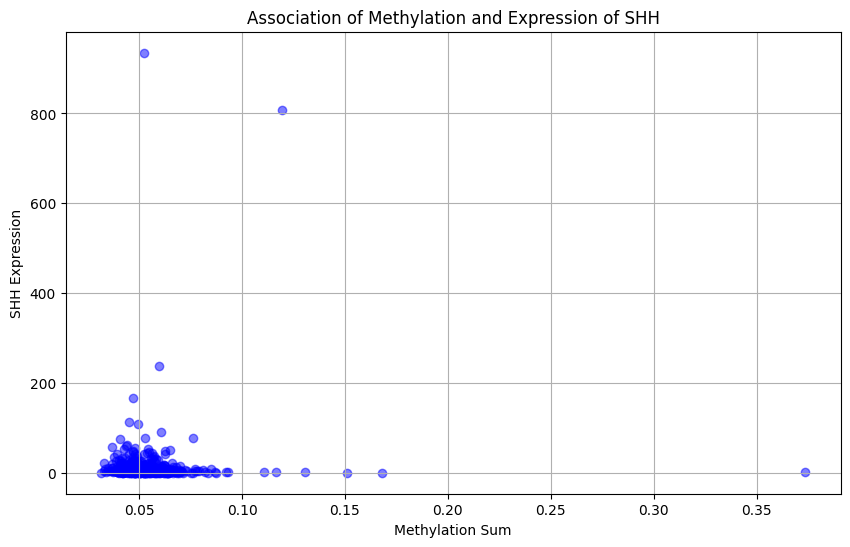

In [ ]:
# Replace non-numeric values with NaN
SHH_tra_cleaned['methylation_sum'] = pd.to_numeric(SHH_tra_cleaned['methylation_sum'], errors='coerce')

# Drop rows with NaN values
SHH_tra_cleaned.dropna(subset=['methylation_sum'], inplace=True)

# plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(SHH_tra_cleaned['methylation_sum'], SHH_tra_cleaned['SHH_expression'], color='blue', alpha=0.5)
plt.xlabel('Methylation Sum')
plt.ylabel('SHH Expression')
plt.title('Association of Methylation and Expression of SHH')
plt.grid(True)
plt.show()

**Plot interpretation:** examining the relationship between methylation and expression of SHH gene. According to the plot increased methylation at the locus is associated with decreased gene expression as we can see points on x-axis with values of 0.15 and 0.37 methylation has zero value of gene expression, while decreased methylation is associated with increased expression as we can see alot of points are accumulated around 0.05 methylation on the x-axis and do have a gene expression value of around 50, 100 or 900. Therefore, subjects with hypermethylated SHH loci may have lower SHH gene expression, potentially impacting downstream signaling pathways associated with SHH activity.

#Q4- B:

I will pick the SHH gene for my gene expression analysis.

In [ ]:
# Extract SHH information from the transposed CNV dataset (df_transposed)
SHH_cnv = df_transposed['SHH']

# Add SHH information to egfr_tra_cleaned dataset
SHH_tra_cleaned['SHH_CNV'] = SHH_cnv

# Display dataset
SHH_tra_cleaned

ENTITY_STABLE_ID,cg00577464,cg25167838,SHH_expression,methylation_sum,SHH_CNV
TCGA-CS-4938-01,0.037688,0.014365,0.8391,0.052053,0.0
TCGA-CS-4941-01,0.070732,0.045589,1.0352,0.116321,1.0
TCGA-CS-4942-01,0.051849,0.017624,5.8824,0.069474,1.0
TCGA-CS-4943-01,0.046645,0.01624,0.3261,0.062885,0.0
TCGA-CS-4944-01,0.047637,0.01735,7.0609,0.064987,0.0
...,...,...,...,...,...
TCGA-WY-A85B-01,0.040326,0.016372,8.1756,0.056698,0.0
TCGA-WY-A85C-01,0.033985,0.013038,2.0433,0.047023,0.0
TCGA-WY-A85D-01,0.029317,0.012325,2.4655,0.041642,0.0
TCGA-WY-A85E-01,0.045583,0.014087,3.0246,0.059670,1.0


<ipython-input-36-b3286225394f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SHH_CNV', y='SHH_expression', data=filtered_data, palette='Blues')


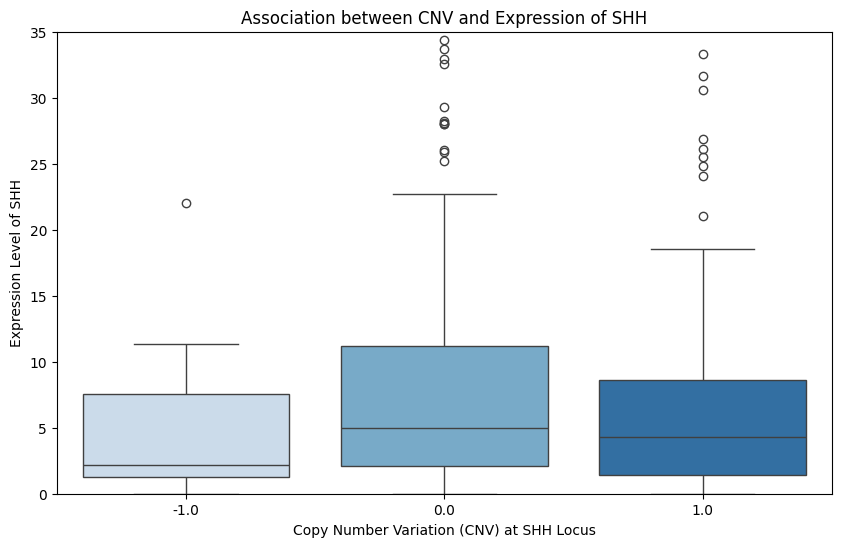

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only CNV values of -1, 0, or 1
filtered_data = SHH_tra_cleaned[SHH_tra_cleaned['SHH_CNV'].isin([-1, 0, 1])]

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SHH_CNV', y='SHH_expression', data=filtered_data, palette='Blues')

# Set y-axis limits
plt.ylim(0, 35)

# Add labels and title
plt.xlabel('Copy Number Variation (CNV) at SHH Locus')
plt.ylabel('Expression Level of SHH')
plt.title('Association between CNV and Expression of SHH')

# Show plot
plt.show()


**Plot interpretation:** Examining the relationship between CNV and expression of SHH gene. we do not see association between CNV and gene expression because at value zero in CNV we can see increased gene expression compared to value of 1 in CNV. Thus amplification of CNV is not always associated with increased gene expression. However, if we look at the deletion (loss of copy numbber) in this case we can see a reduction in the gene expression

#Q5:

       PTCH2  SMO    SHH
PTCH2      1    1  1.000
SMO        1    1  0.001
SHH        1    1  1.000


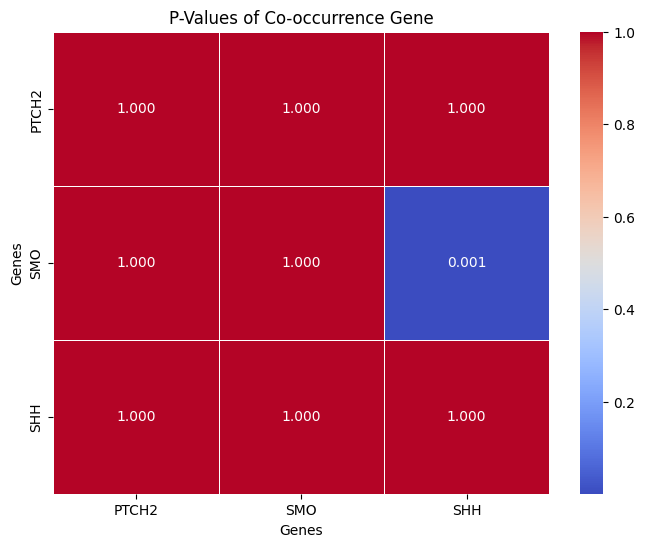

In [ ]:
# add the p-values for each pair
p_values = {
    ('SMO', 'SHH'): 0.001,
    ('SMO', 'PTCH2'): 1,
    ('SHH', 'PTCH2'): 1
}
# List of genes
genes = ['PTCH2', 'SMO', 'SHH']
# Create a DataFrame to store the results
co_occurrence = pd.DataFrame(columns=genes, index=genes)
# represent the DataFrame with the given p-values
for gene1 in genes:
    for gene2 in genes:
        if gene1 != gene2:
            co_occurrence.loc[gene1, gene2] = p_values.get((gene1, gene2), 1)
# Fill  elements with 1
co_occurrence.fillna(1, inplace=True)
# Print co_occurrence DataFrame
print(co_occurrence)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence.astype(float), annot=True, cmap="coolwarm", fmt=".3f", linewidths=.5)
plt.title('P-Values of Co-occurrence Gene')
plt.xlabel('Genes')
plt.ylabel('Genes')
plt.show()

**Plot interpretation:**

Lower p-values represent significant associations while higher p-values represents non-significant associations. Looking at the graph we can determin that p-values less than 0.05 between gene pairs such as (SMO & SHH) are more likely to indicates there is co-occurence.


#Q6:

**Q6-A:** Hypothesis: I hypothesize that the expression levels of SHH genes involved in the SHH signaling pathway are upregulated in the cancer cohort compared to normal samples. In other words,  hypothesis is that SHH gene has higher expression in tumor vs normal.

I choose violin plot because this plot helps to assess the hypothesis by visually and comparing the median, distribution, and density of data between two groups (normal vs cancerous).

I expect to see higher gene expression levels in SHH cancer samples compared to normal samples


**Q6-B:**

Code explanation:

1- I will load the the file that cotains normal samples in genomic analysis (data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt)

2- I will select the SHH gene involved in SHH signaling pathway.

3- Create a boxplot comparing the expression levels of these genes between the cancer samples and normal samples.

4- Boxplot will have expression levels on the y-axis and two groups (cancer vs. normal) on the x-axis.

In [ ]:
#gene expression data

import os
# Navigate to the directory
os.chdir("/content/drive/MyDrive/cancer genomics/alldata/lgg_tcga_pan_can_atlas_2018")

# Specify the filename
filename = "data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt"

# Read the file into a dataframe
if filename.endswith('.txt'):
    df4 = pd.read_csv(filename, delimiter='\t', index_col=0)  # Assuming the file is tab-delimited

# Display the dataframe
df4.head()

In [ ]:
#flip table
df4_transposed = df4.transpose()
df4_transposed

In [ ]:
# Extract the column corresponding to EGFR
SHH_norcolumn = df4_transposed['SHH']
SHH_norcolumn

In [ ]:
#add this column to the egfr_tra_cleaned dataset
SHH_tra_cleaned['normal_SHH_expression'] = df4_transposed['SHH']
SHH_tra_cleaned

ENTITY_STABLE_ID,cg00577464,cg25167838,SHH_expression,methylation_sum,SHH_CNV,normal_SHH_expression
TCGA-CS-4938-01,0.037688,0.014365,0.8391,0.052053,0.0,-0.1967
TCGA-CS-4941-01,0.070732,0.045589,1.0352,0.116321,1.0,-0.1938
TCGA-CS-4942-01,0.051849,0.017624,5.8824,0.069474,1.0,-0.1225
TCGA-CS-4943-01,0.046645,0.01624,0.3261,0.062885,0.0,-0.2042
TCGA-CS-4944-01,0.047637,0.01735,7.0609,0.064987,0.0,-0.1052
...,...,...,...,...,...,...
TCGA-WY-A85B-01,0.040326,0.016372,8.1756,0.056698,0.0,-0.0888
TCGA-WY-A85C-01,0.033985,0.013038,2.0433,0.047023,0.0,-0.1790
TCGA-WY-A85D-01,0.029317,0.012325,2.4655,0.041642,0.0,-0.1728
TCGA-WY-A85E-01,0.045583,0.014087,3.0246,0.059670,1.0,-0.1645


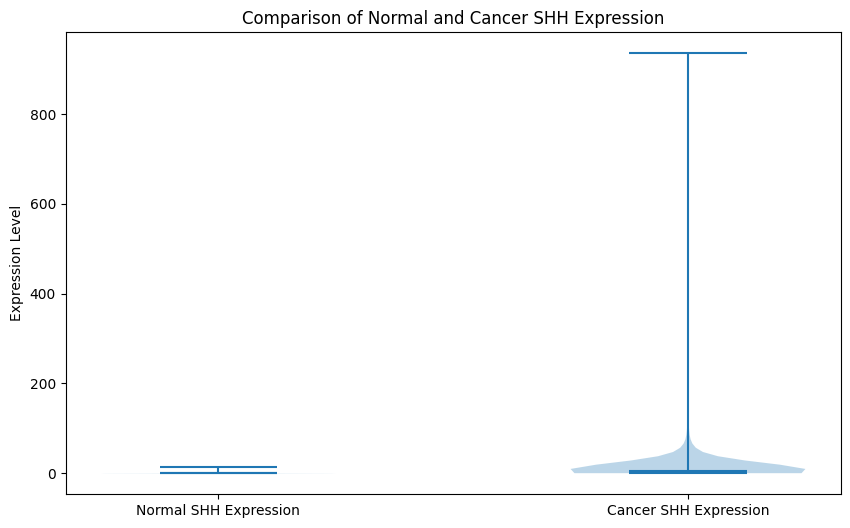

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot violin plots for normal and cancer SHH expression
ax.violinplot([SHH_tra_cleaned['normal_SHH_expression'], SHH_tra_cleaned['SHH_expression']],
              showmeans=False, showmedians=True)

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Normal SHH Expression', 'Cancer SHH Expression'])

# Set title and y-axis label
ax.set_title('Comparison of Normal and Cancer SHH Expression')
ax.set_ylabel('Expression Level')

# Show plot
plt.show()

**Plot interpretation:** looking at the expression level of SHH gene between normal samples and cancer samples. it looks like the expression level in cancer is much higher compared to normal samples. We can see the density of data of cancer sample around 5 to 100 gene expression level. However, in normal samples its too low that we can only see minimum and maximum values. The significant difference between both gene expression levels suggest that upregulation of SHH in cancer samples. Thus by comparing both violin plots we can determine that SHH expression level is being elevated in cancer cohort compared to normal samples and this supports the hypothesis




#Q7:

**Article:** "Expression analysis and regulation of GLI and its correlation with stemness and metabolic alteration in human brain tumor"

link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9755437/#:~:text=GLI%20proteins%20promote%20cancer%20by,%2Doncogene%20(Bermudez%20et%20al

**Gap in knowlwdge:** understanding the specific mechanisms through which GLI genes interact with other genes to drive tumor initiation and progression. Also explores the role of GLI genes in brain cancer development and progression. Understanding the specific role of GLI genes in different subtypes of glioblastoma multiforme (GBM), lower-grade glioma (LGG), and medulloblastoma (MB), as well as their interaction with the tumor microenvironment

**Hypothesis:** Increased expression of GLI genes (GLI1, GLI2, GLI3) is correlated with brain tumor initiation, progression, and poor patient survival across different types of brain tumors, including glioblastoma multiforme (GBM), lower-grade glioma (LGG), and medulloblastoma (MB)

**Experimental design:** The investigation focuses on exploring the involvement of GLI genes in the development and progression of brain cancer in glioblastoma multiforme (GBM), lower-grade glioma (LGG), and medulloblastoma (MB). Using samples from both tumor tissues and normal brain tissues, the experimental design includes a thorough examination of gene expression profiles gathered from The Cancer Genome Atlas (TCGA), Genotype-Tissue Expression Portal (GTEx), and Gene Expression Omnibus (GEO) databases.  

A variety of analytical techniques are utilized to validate abnormal gene expression, assess overall survival rates, study gene/protein interaction networks, examine transcriptional subnetworks, and carry out functional category enrichment analysis, a variety of analytical techniques are utilized.

The observation (each sample is an observation ~ 1000) demonstrate the overexpression of GLI2 and GLI3 genes in brain cancers as well as associations between GLI genes and angiogenesis-related gene (VEGFA), metabolic genes (ENO1, ENO2), and stemness-related factors (SOX2, SOX9, POU5F1, NANOG).

The study's variables (~5) include transcriptional regulatory networks, overall survival rates, gene-protein interactions, gene expression levels, and functional enrichment profiles. These variables together provides insight on the molecular mechanisms behind the development of brain tumors and suggest possible targets for treatment.



**Q7-B: Summarize how the findings in the article relates to your findings above about the pathway.**

GLI genes play a critical role in the development and progression of brain cancer, particularly in GBM (Glioblastoma Multiforme), LGG (Lower-grade Glioma, Medulloblastoma), and MB (Medulloblastoma, Multiforme). GLI genes are transcription factors that regulate the SHH pathway. This article discusses how GLI genes are upregulated in brain tumors (including GBM and MB) and how they interact with stemness related factors, metabolic genes and angiogenesis related genes. GLI gene expression is correlated with patient survival rates, suggesting that GLI genes play a prognostic role in brain cancer.

#**Q7_C:**

/content/drive/MyDrive/cancer genomics


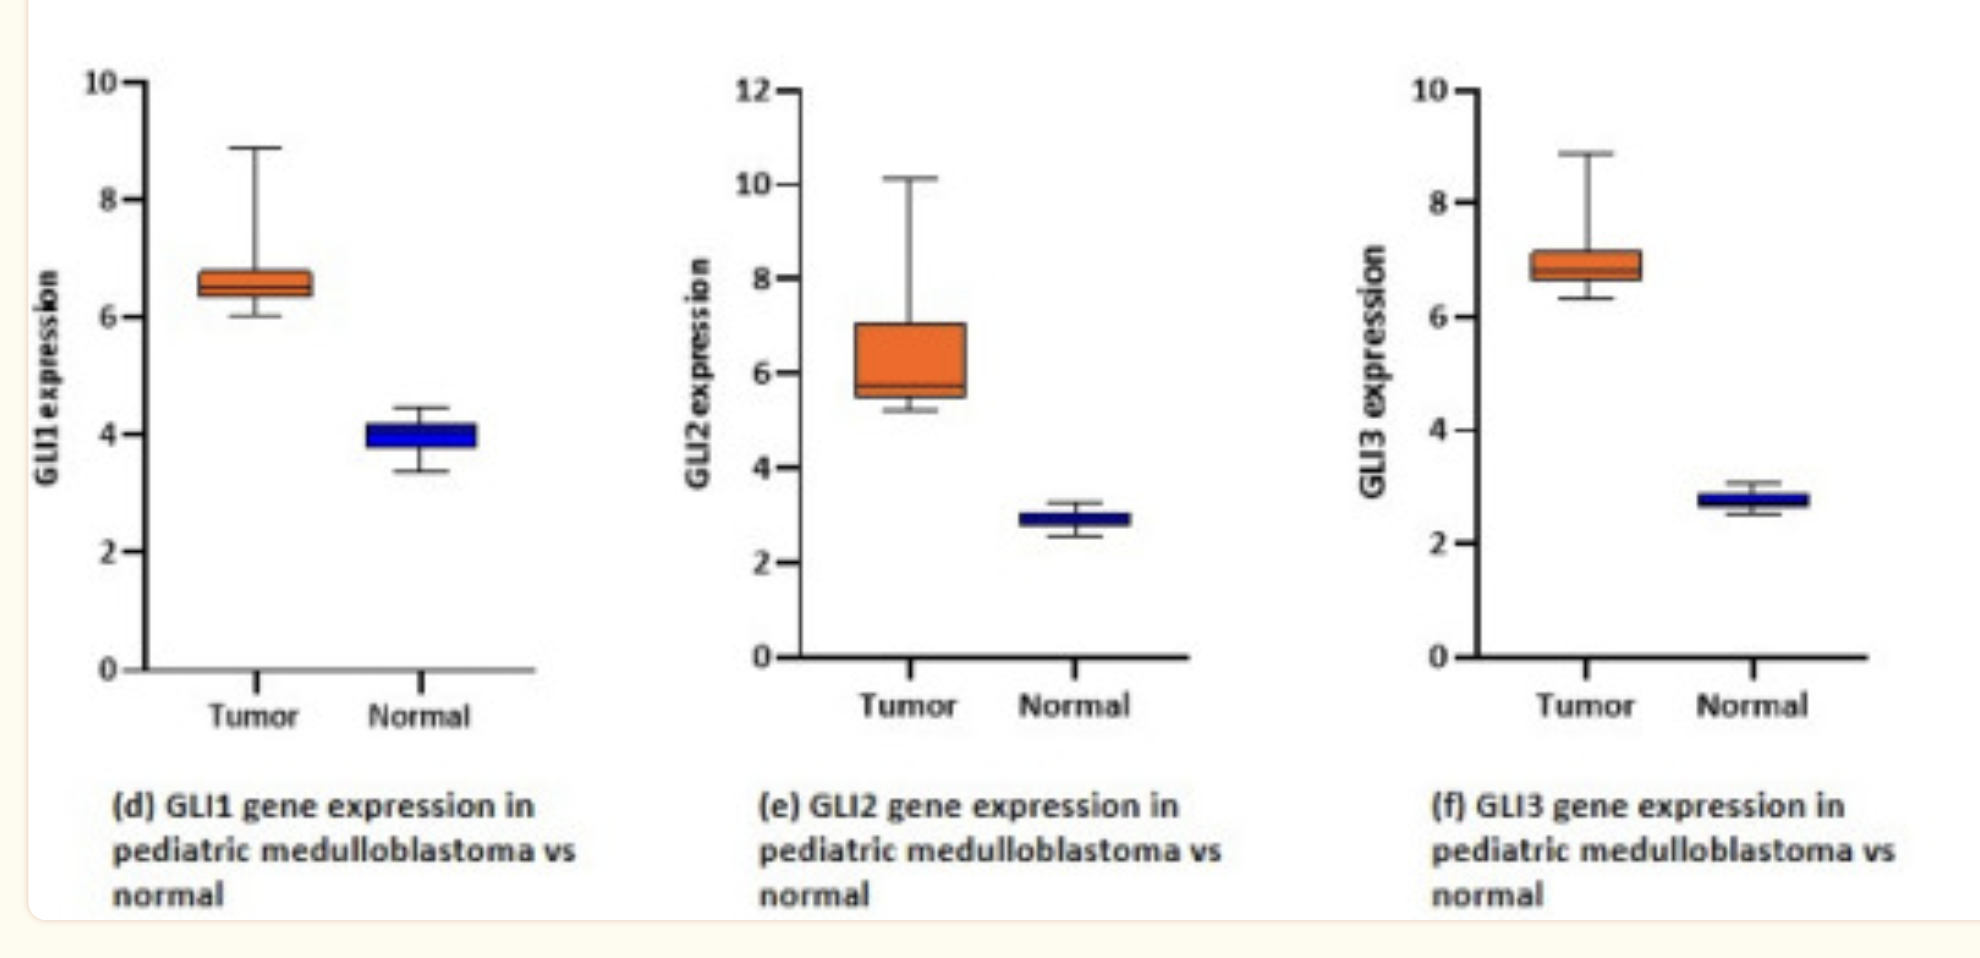

In [ ]:
%cd "/content/drive/MyDrive/cancer genomics"
from IPython.display import Image
Image(filename='Screenshot1.png')

**y-axis:** shows GLI (GLI1,2 and 3) genes expression level

**x-axis:** shows pediatric medulloblastoma tumor samples compared to normal pediatric brain samples

**bars:** shows the distribution of GLI genes expression levels within each group.

**sentence:** the log2 expression values of GLI1/2/3 genes are very much higher in pediatric medulloblastoma tumor as compared to normal pediatric brain samples  (Fig. 1d, e, f).

**related to figure:** in the figure we can see that in all GLI genes (GLI1,2 and 3) expression levels represent higher distribution of expression level (organ box) in tumor samples compared to normal samples


/content/drive/MyDrive/cancer genomics


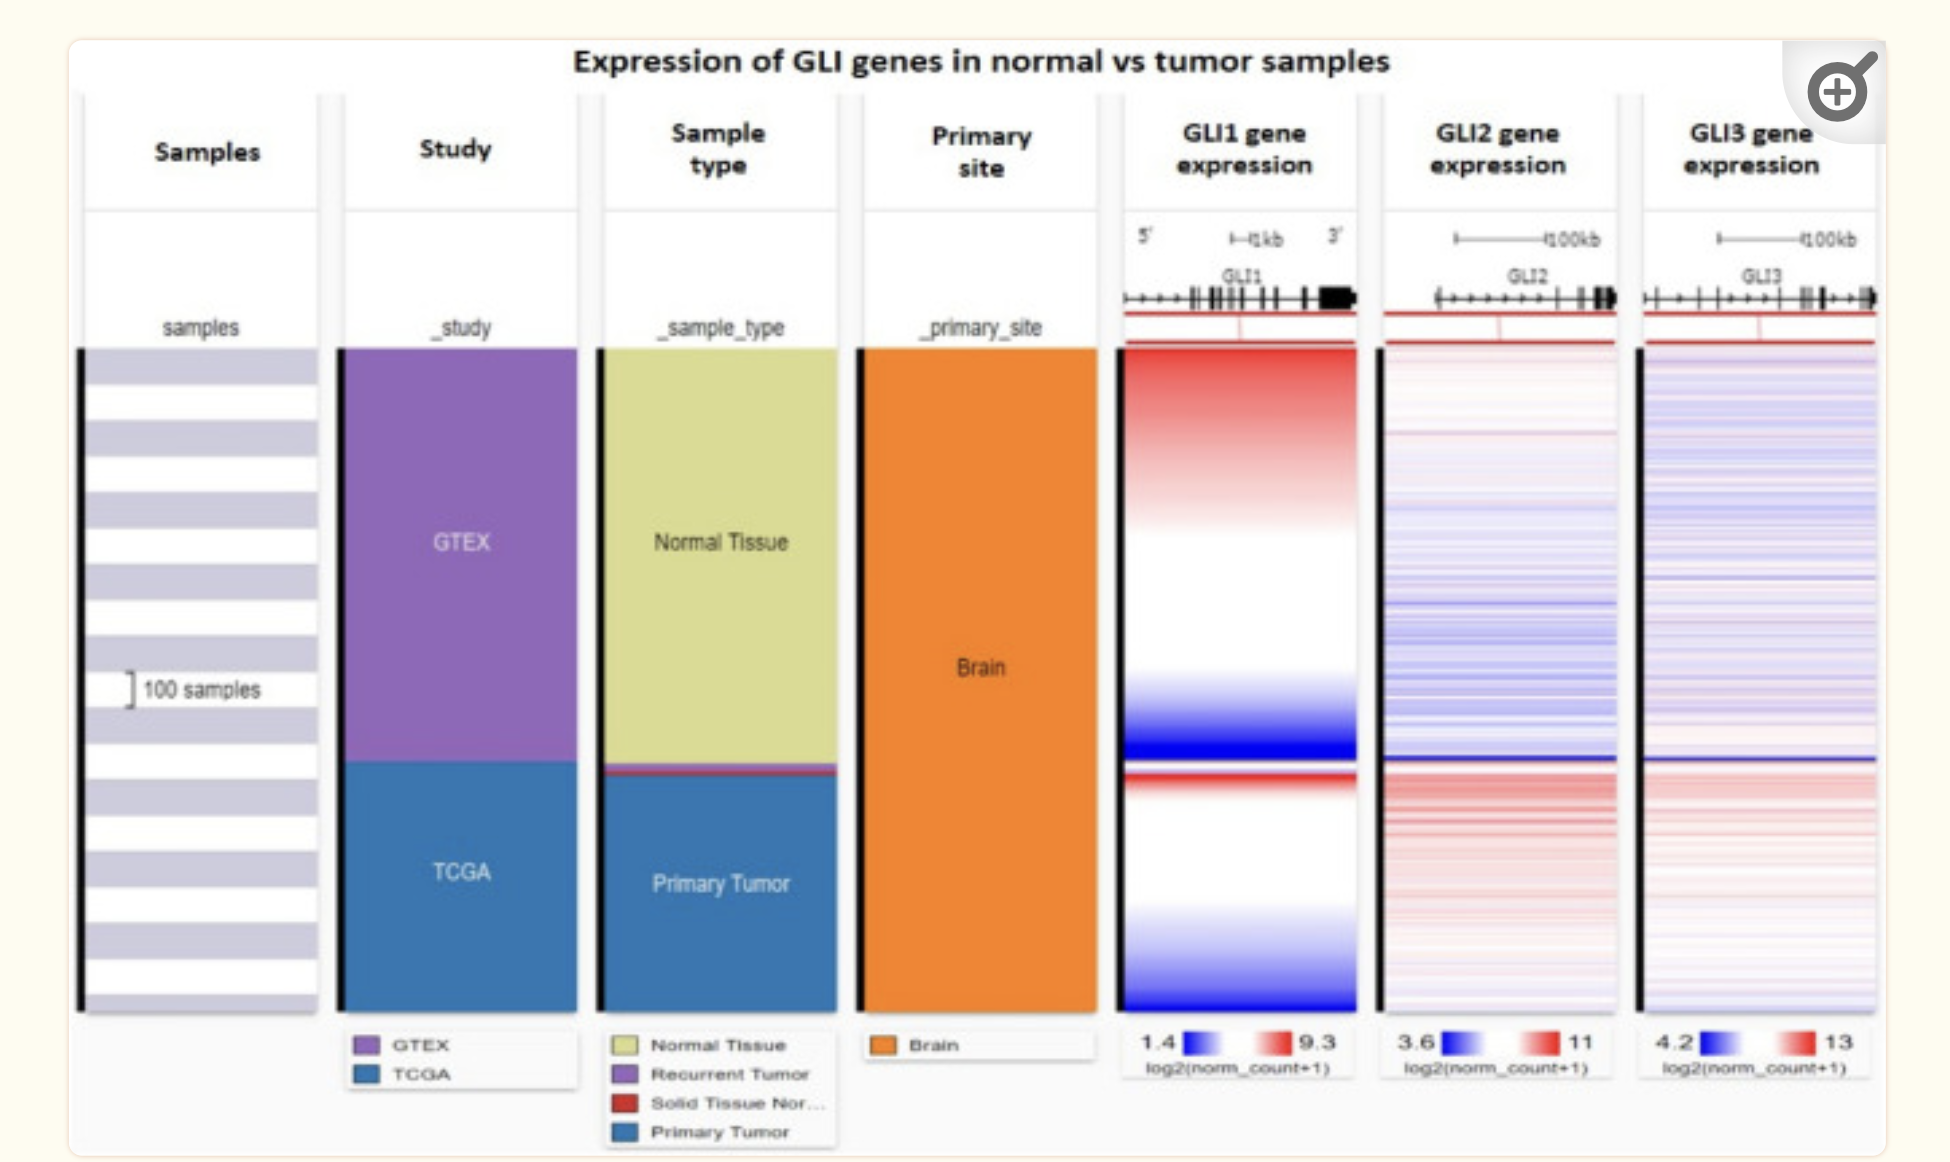

In [ ]:
%cd "/content/drive/MyDrive/cancer genomics"
from IPython.display import Image
Image(filename='Screenshot2.png')

**y-axis:** are the samples (patient)

**x-axis:** shows the GLI 1, 2, and 3 genes expression leveles between normal tissue and primary tumor as in the last three column on the right side

**colors mean:** red color increase in gene expression (amplification) while blue indicates lower gene expression (loss/deletion). white area neutral expression

**sentence:** The expression profile of GLI1 gene is quite similar in tumor vs normal samples, while the GLI2 and GLI3 gene expression chart showed larger and darker red area in tumor samples and larger blue color area in normal samples

**interpretation:** according to the figure in last 2 columns (GLI 2 and 3) we can see that the upper part of column (representing normal tissue) for both genes shows blue color indicating lower expression level. while lower part of column (representing primary tumor) shows red color indicating an increase in gene expression. Moreover, GLI1 shows similar results between both normal and tumor tissues as we can see in the upper part of column (that represent normal tissue) we can see all 3 colors red, white and blue. Similar pattern is observed in the lower part of column (representing tumor samples) thus GLI1 expression level is quite similar in both tumor and normal